<a href="https://colab.research.google.com/github/ClarisseAlvarenga/codenation_aceleradev_ds/blob/master/Desafio_4_codenation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [110]:
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

## Parte 1

### _Setup_ da parte 1

In [111]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [112]:
# Sua análise da parte 1 começa aqui.
dataframe.head()


,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


In [113]:
dataframe.describe()

,normal,binomial
count,10000.000000,10000.000000
mean,19.991456,20.097000
std,4.013850,4.041191
min,4.310399,6.000000
25%,17.309638,17.000000
50%,19.989620,20.000000
75%,22.684324,23.000000
max,35.704951,36.000000


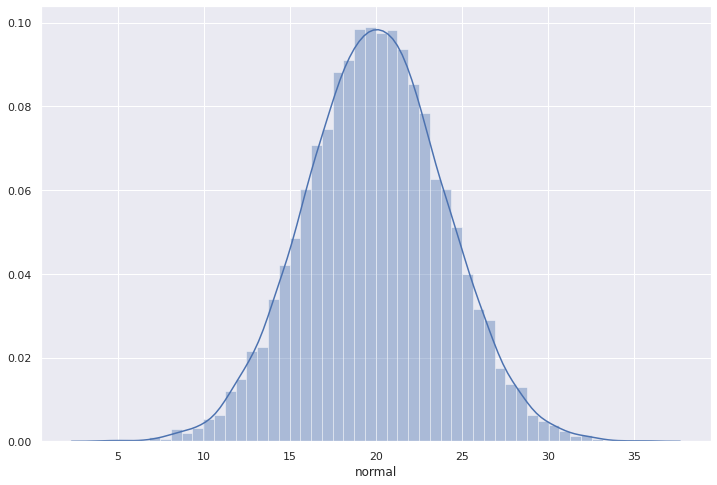

In [114]:
#visualizando as distribuições
#distribuição normal
sns.distplot(dataframe.normal)

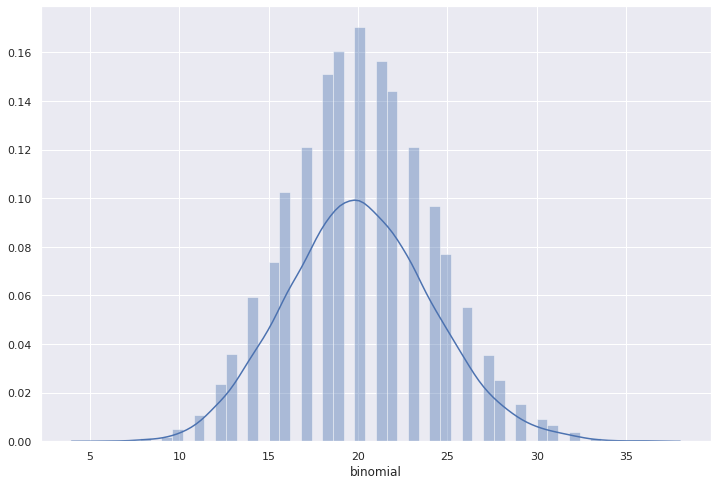

In [115]:
#distribuição binomial
sns.distplot(dataframe.binomial)

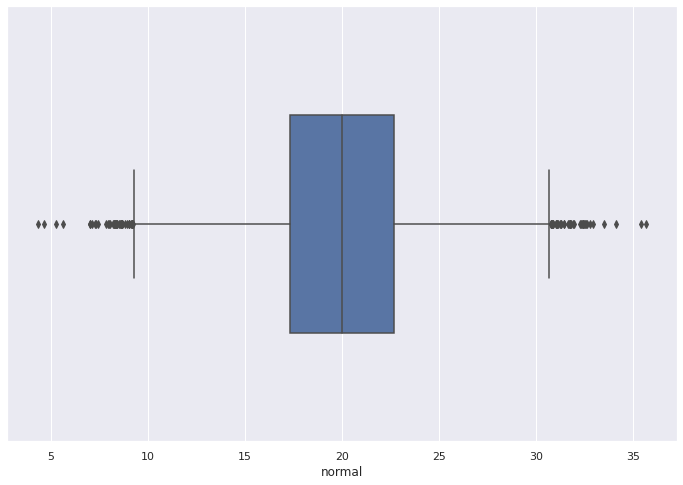

In [116]:
#criando os boxplots
sns.boxplot(dataframe.normal, width=0.5)

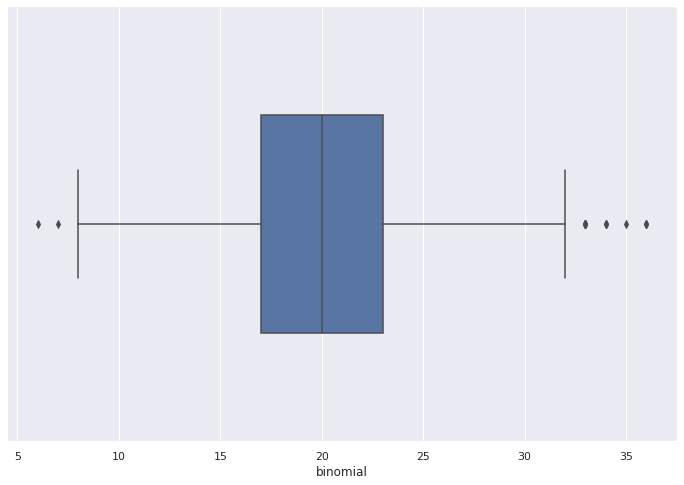

In [117]:
sns.boxplot(dataframe.binomial, width=0.5)

In [118]:
#buscando apenas os quartis 
quartis = dataframe.describe().loc[['25%', '50%', '75%']]
quartis


,normal,binomial
25%,17.309638,17.0
50%,19.989620,20.0
75%,22.684324,23.0


In [119]:
quartis['diferenca'] = (quartis['normal'] - quartis['binomial']).round(3)
quartis

,normal,binomial,diferenca
25%,17.309638,17.0,0.310
50%,19.989620,20.0,-0.010
75%,22.684324,23.0,-0.316


In [120]:
tuple(quartis['diferenca'].values)

(0.31, -0.01, -0.316)

## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

### Usando o Pandas e fazendo quartil a quartil

In [121]:
def q1():
    return tuple(quartis['diferenca'].values)

Para refletir:

* Você esperava valores dessa magnitude?

* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

In [122]:
#calculando o intervalo do jeito difícil
media = dataframe['normal'].mean()
desvio = dataframe['normal'].std()
print('média: ',media)
print('desvio padrão: ',desvio)
minimo = media - desvio
maximo = media + desvio
intervalo = [minimo, maximo]
print('intervalo: ', intervalo)

média:  19.991456066526293
desvio padrão:  4.013849522013619
intervalo:  [15.977606544512675, 24.005305588539912]


#calculando os Z inferior e superior


#### H0 = 68% da amostra se encaixa neste intervalo (média mais um desvio padrão)



In [182]:
Z_inferior = ((minimo - media)/desvio)
Z_superior = ((maximo - media)/desvio)
#cálculo manual
probabilidade = sct.norm.cdf(Z_superior) - (1 - sct.norm.cdf(Z_superior))
probabilidade.round(3)

0.683

In [187]:
probabilidade = sct.norm.cdf(maximo , loc=20, scale=4) - sct.norm.cdf(minimo , loc=20, scale=4) 
probabilidade.round(3)


0.684

In [188]:
def q2():
    return float(probabilidade.round(3))


Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

In [125]:
#para dois desvios padrão (esperado 95%)
minimo_2 = media - (2*desvio)
maximo_2 = media + (2* desvio)
Z_inferior_2 = ((minimo_2 - media)/desvio)
Z_superior_2 = ((maximo_2 - media)/desvio)
probabilidade_2 = sct.norm.cdf(Z_superior_2) - sct.norm.cdf(Z_inferior_2)
probabilidade_2.round(3)

0.954

In [126]:
#para 3 desvios padrão (esperado 99%)
minimo_3 = media - (3*desvio)
maximo_3 = media + (3* desvio)
Z_inferior_3 = ((minimo_3 - media)/desvio)
Z_superior_3 = ((maximo_3 - media)/desvio)
probabilidade_3 = sct.norm.cdf(Z_superior_3) - sct.norm.cdf(Z_inferior_3)
probabilidade_3.round(3)

0.997

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [127]:
#vamos fazer do jeito manual
#media e variação da distribuição normal
m_norm = dataframe['normal'].mean()
v_norm = dataframe['normal'].var()
print('media e variação da distribuição normal', [m_norm, v_norm])
#media e variação da distribuição binomial
m_binom = dataframe['binomial'].mean()
v_binom = dataframe['binomial'].var()
print('media e variação da distribuição binomial', [m_binom, v_binom])

media e variação da distribuição normal [19.991456066526293, 16.110987985368958]
media e variação da distribuição binomial [20.097, 16.331224122412277]


In [128]:
#calculando as diferenças
diff_media = (m_binom - m_norm)
diff_var = (v_binom - v_norm)
array_diferencas = [diff_media, diff_var]
print(array_diferencas)
print(tuple(array_diferencas))

[0.10554393347370805, 0.2202361370433188]
(0.10554393347370805, 0.2202361370433188)


In [129]:
#usando o describe
#buscando média e desvio padrão pra tirar a variancia
media_e_std = dataframe.describe().loc[['mean', 'std']]
media_e_std

,normal,binomial
mean,19.991456,20.097000
std,4.013850,4.041191


In [130]:
media_e_std = media_e_std.transpose()


In [131]:
media_e_std['var'] = media_e_std['std'] * media_e_std['std']
media_e_std

,mean,std,var
normal,19.991456,4.013850,16.110988
binomial,20.097000,4.041191,16.331224


In [132]:
media_e_std.drop('std', axis=1, inplace=True)

In [133]:
media_e_std = media_e_std.transpose()

In [134]:
media_e_std['diff'] = (media_e_std['binomial'] - media_e_std['normal'])
media_e_std

,normal,binomial,diff
mean,19.991456,20.097000,0.105544
var,16.110988,16.331224,0.220236


In [135]:
tuple((media_e_std['diff']).round(3))

(0.106, 0.22)

In [136]:
def q3():
    return tuple((media_e_std['diff']).round(3))


Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

## Parte 2

### _Setup_ da parte 2

In [165]:
pd.read_csv('HTRU_2.csv')

,140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0
...,...,...,...,...,...,...,...,...,...
17892,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17893,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17894,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17895,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [138]:
stars = pd.read_csv("HTRU_2.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [139]:
# Sua análise da parte 2 começa aqui.
stars.head()


,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [140]:
#vendo a proporção de pulsares
stars.target.value_counts(normalize=True)

False    0.90842
True     0.09158
Name: target, dtype: float64

In [141]:
stars.describe()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve
count,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000,17897.000000
mean,111.078321,46.549021,0.477897,1.770417,12.614926,26.326918,8.303574,104.859419
std,25.652705,6.843040,1.064056,6.168058,29.473637,19.471042,4.506217,106.517270
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976
25%,100.929688,42.375426,0.027108,-0.188528,1.923077,14.437330,5.781485,34.957119
50%,115.078125,46.946435,0.223241,0.198736,2.801839,18.459977,8.433872,83.068996
75%,127.085938,51.022887,0.473349,0.928206,5.464883,28.428152,10.702973,139.310905
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837


## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

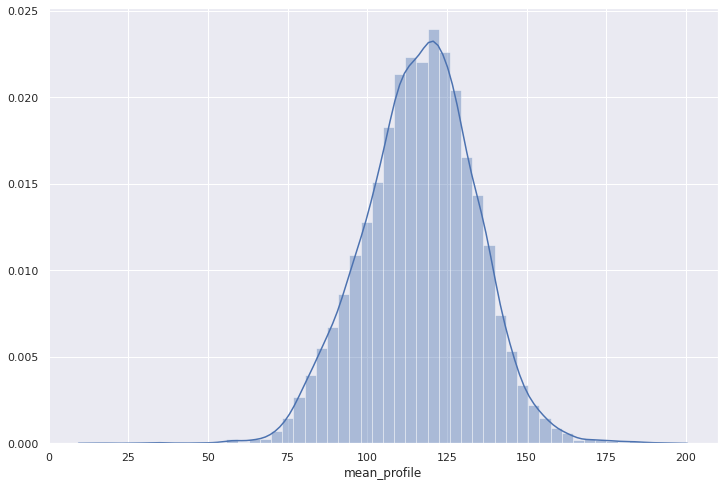

In [142]:
 sns.distplot(stars.query("target == False")['mean_profile'])

In [143]:
false_pulsar_mean_profile = stars.query("target == False")['mean_profile']

In [144]:
#padronizando sem usar o SKLearn

false_pulsar_mean_profile_standardized = (false_pulsar_mean_profile - false_pulsar_mean_profile.mean())/false_pulsar_mean_profile.std()
false_pulsar_mean_profile_standardized

0       -0.804181
1       -0.775123
2        1.155263
3       -1.592787
4       -1.315613
           ...   
17892    1.136934
17893    0.342963
17894    0.158776
17895   -0.117504
17896   -3.404704
Name: mean_profile, Length: 16258, dtype: float64

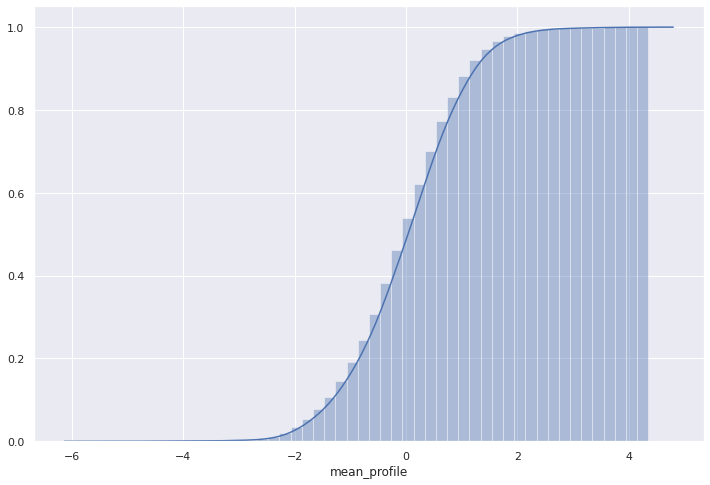

In [145]:
sns.distplot(false_pulsar_mean_profile_standardized, hist_kws={'cumulative': True}, kde_kws={'cumulative': True})

In [146]:
#checando o processo
media_pulsar = false_pulsar_mean_profile_standardized.mean()
desvio_pulsar = false_pulsar_mean_profile_standardized.std()

In [189]:
#calculando os Z teóricos numa distribuição normal
z_80 = sct.norm.ppf(0.80, loc=0, scale=1)
z_90 = sct.norm.ppf(0.90, loc=0, scale=1)
z_95 = sct.norm.ppf(0.95, loc=0, scale=1)


In [190]:
print(z_80)
print(z_90)
print(z_95)


0.8416212335729143
1.2815515655446004
1.6448536269514722


In [193]:
#Calculando os Z do DF
print(false_pulsar_mean_profile_standardized.quantile(0.80).round(3))
print(false_pulsar_mean_profile_standardized.quantile(0.90).round(3))
print(false_pulsar_mean_profile_standardized.quantile(0.95).round(3))


0.825
1.231
1.56


In [195]:
#calculando as probabilidades usando o scipy.stats
probabilidade_80  = (ECDF(false_pulsar_mean_profile_standardized)([z_80][0]).round(3))
probabilidade_80.round(3)

0.806

In [196]:
probabilidade_90 = (ECDF(false_pulsar_mean_profile_standardized)([z_90][0]).round(3))
probabilidade_90.round(3)

0.911

In [197]:
probabilidade_95 = (ECDF(false_pulsar_mean_profile_standardized)([z_95][0]).round(3))
probabilidade_95.round(3)

0.959

In [198]:
probabilidades_resposta_4 = tuple([probabilidade_80.round(3), probabilidade_90.round(3), probabilidade_95.round(3) ])
probabilidades_resposta_4

(0.806, 0.911, 0.959)

In [154]:
def q4():
    return probabilidades_resposta_4

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`? 
   que ela se assemelha a uma distribuição normal, mas não é uma distribuição normal

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [155]:
estatistica, p_valor = sct.normaltest(false_pulsar_mean_profile_standardized)

In [156]:
#conferindo se é uma distribuição normal pelo scipy stats - e não é 
p_valor <= 0.05

True

In [157]:
#calculando os quantis de uma distribuição normal:
Q1_normal = sct.norm.ppf(0.25)
Q2_normal = sct.norm.ppf(0.50)
Q3_normal = sct.norm.ppf(0.75)
print(Q1_normal)
print(Q2_normal)
print(Q3_normal)


-0.6744897501960817
0.0
0.6744897501960817


In [158]:
#verificando os quantis do dataset padronizado
false_pulsar_mean_profile_standardized.describe()

count    1.625800e+04
mean     2.420393e-16
std      1.000000e+00
min     -5.685134e+00
25%     -6.471532e-01
50%      3.985947e-02
75%      6.706549e-01
max      4.352157e+00
Name: mean_profile, dtype: float64

In [159]:
Q1_stars = false_pulsar_mean_profile_standardized.quantile(0.25)
Q2_stars = false_pulsar_mean_profile_standardized.quantile(0.50)
Q3_stars = false_pulsar_mean_profile_standardized.quantile(0.75)

print(Q1_stars)
print(Q2_stars)
print(Q3_stars)


-0.6471531766285941
0.03985946669725159
0.670654872412409


In [160]:
Q1_diff = round((Q1_stars - Q1_normal),3)
Q1_diff

0.027

In [161]:
Q2_diff = round((Q2_stars - Q2_normal),3)
Q2_diff

0.04

In [162]:
Q3_diff = round((Q3_stars - Q3_normal),3)
Q3_diff

-0.004

In [163]:
tuple([Q1_diff, Q2_diff, Q3_diff])

(0.027, 0.04, -0.004)

In [164]:
def q5():
  return tuple([Q1_diff, Q2_diff, Q3_diff])


Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.